In [16]:
import torch.nn.functional as f
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# TorchでMNIST-ネットワーク定義Python
class MyNet(torch.nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 1000)
        self.fc2 = torch.nn.Linear(1000, 10)
 
    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
 
        return f.log_softmax(x, dim=1)

In [6]:
# torchでMNIST_データセットPython
def load_MNIST(batch=128, intensity=1.0):
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data',
                       train=True,
                       download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x * intensity)
                       ])),
        batch_size=batch,
        shuffle=True)
 
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data',
                       train=False,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x * intensity)
                       ])),
        batch_size=batch,
        shuffle=True)
 
    return {'train': train_loader, 'test': test_loader}

In [7]:
if __name__ == '__main__':
    # 学習回数
    epoch = 20

    # 学習結果の保存用
    history = {
        'train_loss': [],
        'test_loss': [],
        'test_acc': [],
    }

    # ネットワークを構築
    net: torch.nn.Module = MyNet()
    
    # MNISTのデータローダーを取得
    loaders = load_MNIST()

3.8%

31.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


102.8%
18.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
print(loaders["train"].shape())

AttributeError: 'DataLoader' object has no attribute 'shape'

In [8]:
optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001)

In [25]:
for e in range(epoch):
    loss = None
    # 学習開始 (再開)
    net.train(True)  # 引数は省略可能
    for i, (data, target) in enumerate(loaders['train']):
        # 全結合のみのネットワークでは入力を1次元に
        # print(data.shape)  # torch.Size([128, 1, 28, 28])
        data = data.view(-1, 28*28)
        # print(data.shape)  # torch.Size([128, 784])

        optimizer.zero_grad()
        output = net(data)
        loss = f.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        if i % 10 == 0:
            print('Training log: {} epoch ({} / 60000 train. data). Loss: {}'.format(e+1,
                                                                                        (i+1)*128,
                                                                                        loss.item())
                    )

    history['train_loss'].append(loss)
    """ Test Part """
    # 学習のストップ
    net.eval()  # または net.train(False) でも良い
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data = data.view(-1, 28 * 28)
            output = net(data)
            test_loss += f.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= 10000

    print('Test loss (avg): {}, Accuracy: {}'.format(test_loss,
                                                        correct / 10000))

    history['test_loss'].append(test_loss)
    history['test_acc'].append(correct / 10000)


tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

{'train_loss': [tensor(0.3581, grad_fn=<NllLossBackward0>), tensor(0.1674, grad_fn=<NllLossBackward0>), tensor(0.1579, grad_fn=<NllLossBackward0>), tensor(0.2068, grad_fn=<NllLossBackward0>), tensor(0.0785, grad_fn=<NllLossBackward0>), tensor(0.0757, grad_fn=<NllLossBackward0>), tensor(0.0299, grad_fn=<NllLossBackward0>), tensor(0.0394, grad_fn=<NllLossBackward0>), tensor(0.0288, grad_fn=<NllLossBackward0>), tensor(0.0226, grad_fn=<NllLossBackward0>), tensor(0.0447, grad_fn=<NllLossBackward0>), tensor(0.0076, grad_fn=<NllLossBackward0>), tensor(0.0155, grad_fn=<NllLossBackward0>), tensor(0.0177, grad_fn=<NllLossBackward0>), tensor(0.0141, grad_fn=<NllLossBackward0>), tensor(0.0167, grad_fn=<NllLossBackward0>), tensor(0.0085, grad_fn=<NllLossBackward0>), tensor(0.0060, grad_fn=<NllLossBackward0>), tensor(0.0037, grad_fn=<NllLossBackward0>), tensor(0.0050, grad_fn=<NllLossBackward0>), tensor(0.0082, grad_fn=<NllLossBackward0>), tensor(0.0026, grad_fn=<NllLossBackward0>), tensor(0.0019, g

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

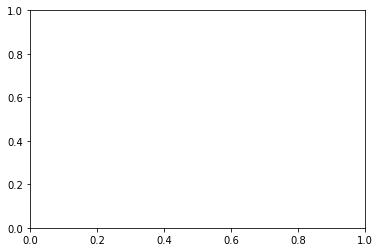

In [17]:
# 結果の出力と描画
print(history)
plt.figure()
plt.plot(range(1, epoch+1), history['train_loss'], label='train_loss')
plt.plot(range(1, epoch+1), history['test_loss'], label='test_loss')
plt.xlabel('epoch')
plt.legend()
plt.savefig('loss.png')

plt.figure()
plt.plot(range(1, epoch+1), history['test_acc'])
plt.title('test accuracy')
plt.xlabel('epoch')
plt.savefig('test_acc.png')